# <span style="color:#54B1FF">Clustering:</span> &nbsp; <span style="color:#1B3EA9"><b>Evaluating Performance</b></span></span>

<br>

In clusterting problems, since the true labels are unknown, it is not possible to calculate prediction accuracy (i.e., whether or not a trained clustering algorithm correctly predicts labels). Instead, one can evaluate the quality of clustering using various metrics.

The two metrics considered in this chapter are the [silhouette score (S-Score)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) and [silhouette samples (S-Samples)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples). The S-Score pertains to all data (in a training or test set) and S-Samples pertains to each individual observation.

Both the S-Score and S-Samples are [silhouette coefficients](https://en.wikipedia.org/wiki/Silhouette_(clustering)). A silhouette coefficient describes both the compactness and separation of clusters. When (a) observations are tightly packed in clusters and/or (b) clusters are far apart, slihouette coefficients tend to increase toward one.  Silhouette coefficient values range between -1 and +1. As a rough interpretation of silhouette coefficient values:

* +1 : observations are very tightly packed in clusters, and clusters are far apart
* 0 : clusters start to overlap
* -1 : no distinct clusters exist


<br>
<br>

Note that the S-Score and S-Samples are just two of many different kinds of clustering metrics. You can read about more clustering metrics in the [sklearn documentation](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation)

<br>
<br>

The remainder of this notebook demonstrates how to calculate S-Score and S-Samples, and shows the behavior of these metrics in different situations.

<br>
<br>

___

Let's import the packages we'll need for this notebook:

<br>
<br>

In [1]:

import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics


<br>
<br>

Let's also copy the `plot_labeled_points` function from the previous notebook.

<br>
<br>

In [2]:
def plot_labeled_points(x, labels, colors=None, ax=None, ms=12):
    x      = np.asarray(x)
    ax     = plt.gca() if (ax is None) else ax
    uy     = np.unique(labels)
    for yy,cc in zip(uy,colors):
        xx = x[labels==yy]
        if x.ndim==1:
            ax.plot( xx, np.zeros(xx.size), 'o', color=cc, ms=ms, label=f'Label = {yy}' )
        elif x.ndim==2:
            ax.plot( xx[:,0], xx[:,1], 'o', color=cc, ms=ms, label=f'Label = {yy}' )
    ax.axhline(0, color='k', ls=':')
    ax.legend()


___

## One feature, well-separated clusters

<br>

Let's first consider the case of well-separated clusters.

<br>

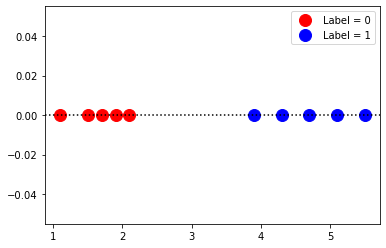

In [3]:

x       = np.array( [1.1, 2.1, 1.5, 1.9, 1.7,    4.3, 3.9, 5.1, 4.7, 5.5] )
X       = np.array([x]).T
kmeans  = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
labels  = kmeans.labels_

plot_labeled_points(x, labels, colors=['r','b'])


<br>

The silhouette coefficients for the clustering results are:

<br>

In [4]:

sscore  = sklearn.metrics.silhouette_score(X, labels)
ssamp   = sklearn.metrics.silhouette_samples(X, labels)

print( 'Silhouette score:')
print( sscore )
print()
print( 'Silhouette samples:')
print( ssamp )


Silhouette score:
0.7836639738100873

Silhouette samples:
[0.80555556 0.78846154 0.875      0.85714286 0.88333333 0.73484848
 0.55357143 0.79651163 0.80263158 0.73958333]


<br>

Notes:

* There is just one value for S-Score and that there is one S-Samples value for each observation.
* These silhouette coefficient values are rather high, suggesting good cluster separation.
* However, the values are not 1, which implies that the clusters are not perfectly separated.
* The S-Samples values for the Label=1 observations are slightly smaller than the values for the Label=0 observations. This implies that the Label=1 observations are not as tighly clustered, as we can observe in the figure above.

<br>

Let's next check how silhouette coefficient can similarly be applied to datasets with more than one feature and more than two clusters.

<br>
<br>

___

## Two features, well-separated clusters

<br>

Like the one-feature example above, the two-variable example below yields relatively large silhouette coefficients, implying good cluster separation.
 

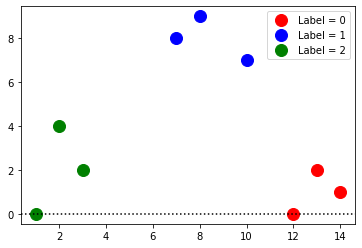

In [5]:

X = np.array([
    [1, 0],
    [2, 4],
    [3, 2],
    [12, 0],
    [13, 2],
    [14, 1],
    [7, 8],
    [10, 7],
    [8, 9],
])


kmeans  = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels  = kmeans.labels_

plot_labeled_points(X, labels, colors=['r','b','g'])



In [6]:

sscore  = sklearn.metrics.silhouette_score(X, labels)
ssamp   = sklearn.metrics.silhouette_samples(X, labels)

print( 'Silhouette score:')
print( sscore )
print()
print( 'Silhouette samples:')
print( ssamp )


Silhouette score:
0.6996375969207913

Silhouette samples:
[0.68212854 0.58084976 0.68885897 0.74746012 0.7610922  0.79803388
 0.70929657 0.55781987 0.77119847]


<br>
<br>

Notes:

* Silhouette coefficient metrics can be applied to datasets with arbitrary numbers of features and clusters
* The silhouette coefficients above are slighlty smaller than those for the one-feature dataset earlier in this notebook. This implies poorer cluster separation

<br>

What happens to these silhouette metrics when clusters become even more poorly separated?

<br>
<br>

___

## Two features, poorly separated clusters

<br>

What happens if the data are not separable into clearly distinct clusters?

The example below shows a case like this. Note that the `dw` values are much higher.
 

Silhouette score:
0.5120609600169729



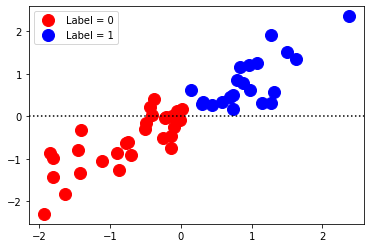

In [7]:

# generate a random dataset
np.random.seed(0)
mean   = [0, 0]
cov    = np.array(  [ [1,0.8] , [0.8,0.8] ]  )
n      = 50
X      = np.random.multivariate_normal(mean, cov, n)  # (n,2) array centered on "mean", with covariance "cov"


kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_


sscore  = sklearn.metrics.silhouette_score(X, labels)
print( 'Silhouette score:')
print( sscore )
print( )


plot_labeled_points(X, labels, colors=['r','b'])


<br>

Note that the S-Score is now even lower than before, suggesting poorer separation.

Let's make the clusters even more difficult to identify by removing the covariance between the features:

<br>

Silhouette score:
0.31661082851915895



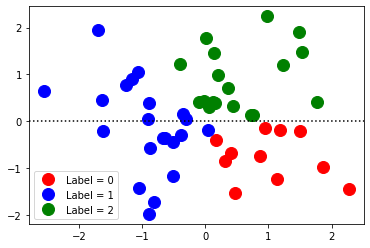

In [8]:

# generate a random dataset
np.random.seed(0)
mean   = [0, 0]
cov    = np.array(  [ [1,0] , [0,1] ]  )
n      = 50
X      = np.random.multivariate_normal(mean, cov, n)  # (n,2) array centered on "mean", with covariance "cov"



kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_


sscore  = sklearn.metrics.silhouette_score(X, labels)
print( 'Silhouette score:')
print( sscore )
print( )


plot_labeled_points(X, labels, colors=['r','b','g'])


<br>

Note that the S-Score is now approaching 0, which implies that it is approaching cluster overlap.

When the S-Score is less than about 0.5, it implies relatively poorly separable clusters.

<br>
<br>

___
<a name="summary"></a>
# Summary
[Back to Table of Contents](#toc)

* The two main categories of machine learning techniques are: **supervised** and **unsupervised** learning.
* The previous chapter considered **supervised** learning, and this chapter considered **unuspervised** learning.
* The key difference between supervised and unsupervised learning is that the former uses known labels, and the latter does not.
* Since the labels are known for supervised learning, algorithmic accuracy can be quantified (see previous chapter).
* Since the labels are unknown for unsupervised learning, accuracy can not be quantified. Instead separation metrics like **slihouette coefficients** are used to summarize the learning result.
* Machine learning results can also be judged qualitatively, using visualization aids like **decision surfaces**.
* Visualizating machine learning results is often necessary to understand how the trained machine makes its decisions. 
